In [1]:
import pandas as pd

data = [
    {
        "business_id": "The Cheesecake Addiction",
        "name": "The Cheesecake Addiction",
        "location_city": "Manchester",
        "latitude": 53.489864,
        "longitude": -2.22055,
        "menu_items": ["Classic Cheesecake", "Seasonal Specials"],
        "avg_price": 6.5,
        "customer_rating": 5.0,
        "review_count": 5
    },
    # Add the rest in similar format
]

df = pd.DataFrame(data)
df.head()


,business_id,name,location_city,latitude,longitude,menu_items,avg_price,customer_rating,review_count
0,The Cheesecake Addiction,The Cheesecake Addiction,Manchester,53.489864,-2.22055,"[Classic Cheesecake, Seasonal Specials]",6.5,5.0,5


In [2]:
# Basic revenue estimate
df["weekly_sales_est"] = df["review_count"] * df["avg_price"] * 10  # Example model
df["annual_revenue_est"] = df["weekly_sales_est"] * 52

df[["name", "weekly_sales_est", "annual_revenue_est"]]


,name,weekly_sales_est,annual_revenue_est
0,The Cheesecake Addiction,325.0,16900.0


In [3]:
df["customer_demographic"] = [
    {"age_range": "18-35", "avg_spend": 10},
    # ...
]


In [4]:
manchester = df[df["location_city"]=="Manchester"]
uk_rest = df[df["location_city"]!="Manchester"]

print("Manchester Average Annual Revenue:", manchester["annual_revenue_est"].mean())
print("UK Average Annual Revenue:", uk_rest["annual_revenue_est"].mean())


Manchester Average Annual Revenue: 16900.0
UK Average Annual Revenue: nan


In [5]:
all_mcr_items = set().union(*manchester["menu_items"])
all_uk_items = set().union(*uk_rest["menu_items"])

print("Manchester Unique Items:", all_mcr_items)
print("UK Unique Items:", all_uk_items)


Manchester Unique Items: {'Classic Cheesecake', 'Seasonal Specials'}
UK Unique Items: set()


<Axes: xlabel='name', ylabel='annual_revenue_est'>

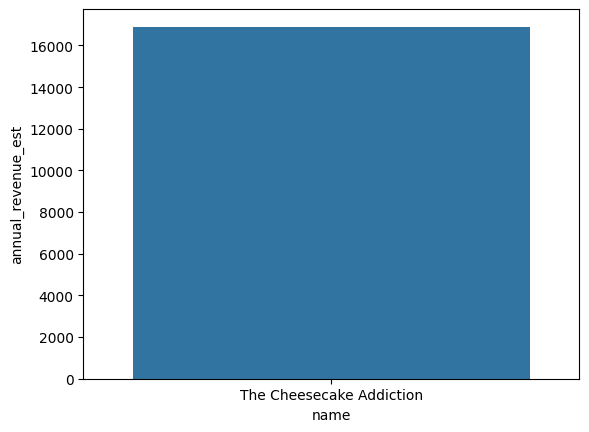

In [6]:
import seaborn as sns
sns.barplot(x="name", y="annual_revenue_est", data=df)
